In [503]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style='ticks')

# <font color=green>Exercício 1<font>

In [152]:
# Import dos dados
dados = pd.read_excel("Lista de Exercícios - Complementares (Final).xlsx", sheet_name="Exercício 1", usecols='A:B', nrows=50, engine="openpyxl")

In [153]:
# Renomeando os nomes das colunas
dados.rename(columns={'Observação':'observacao', 'Renda (R$)':'renda'}, inplace=True)

In [154]:
# Número de observações
n_obs = len(dados)
print('Número de observações é de %.d'% n_obs)

Número de observações é de 50


In [155]:
# Definindo a lista de labels e classes
labels = ['0-2000','2001-4000','4001-6000','6001-8000','8001-10000','10001-12000']
classes = [0, 2000, 4000, 6000, 8000, 10000, 12000]

In [156]:
# Frequência absoluta
frequencia_abs = pd.value_counts(
                   pd.cut(x = dados.renda,
                     bins = classes,
                     labels = labels,
                     include_lowest = True)
                ,sort=False)            

In [157]:
# Frequencia relativa
frequencia_rel = pd.value_counts(
                  pd.cut(x = dados.renda,
                         bins = classes,
                         labels = labels,
                         include_lowest = True)
                ,sort=False, normalize=True)*100            

In [158]:
# Frequencia acumulada
frequencia_acum = frequencia_abs.cumsum()

# Frequencia acumulada relativa
frequencia_acum_rel = frequencia_rel.cumsum() *100

In [159]:
# Tabela de contingência
frequencia = pd.DataFrame({"frequencia_absoluta": frequencia_abs,
                           "frequencia_relativa":frequencia_rel,
                           "frequencia_absoluta_acum":frequencia_acum,
                           "frequencia_acum_rel": frequencia_acum_rel})
frequencia

,frequencia_absoluta,frequencia_relativa,frequencia_absoluta_acum,frequencia_acum_rel
0-2000,9,18.0,9,1800.0
2001-4000,19,38.0,28,5600.0
4001-6000,11,22.0,39,7800.0
6001-8000,5,10.0,44,8800.0
8001-10000,4,8.0,48,9600.0
10001-12000,2,4.0,50,10000.0


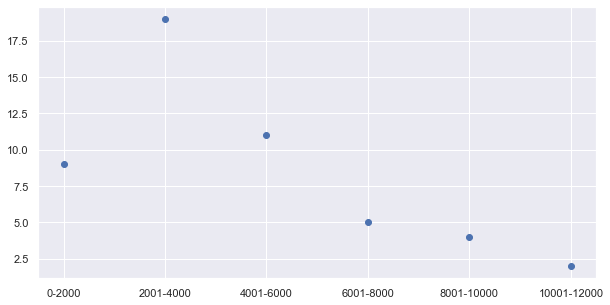

In [162]:
# Plot do gráfico
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(frequencia.frequencia_absoluta, 'o')

In [163]:
# Deletando todas as variáveis
%reset_selective -f a 

# <font color=green>Exercício 2<font>

In [164]:
# Import dos dados
dados = pd.read_excel("Lista de Exercícios - Complementares (Final).xlsx", sheet_name="Exercício 2", usecols='A:C', nrows=23, engine="openpyxl")

In [165]:
# Renomeadno o nome das colunas
dados.rename(columns={'Meses':'meses',
                      'Ação 1':'retorno_1',
                      'Ação 2':'retorno_2'}, inplace=True)

In [166]:
# Estatística descritiva
dados.describe()

,meses,retorno_1,retorno_2
count,23.00000,23.000000,23.000000
mean,12.00000,0.035204,0.151135
std,6.78233,0.129221,0.203822
min,1.00000,-0.201800,-0.149000
25%,6.50000,-0.061200,0.020400
50%,12.00000,0.037000,0.124800
75%,17.50000,0.116050,0.233300
max,23.00000,0.281400,0.626000


<AxesSubplot:xlabel='meses'>

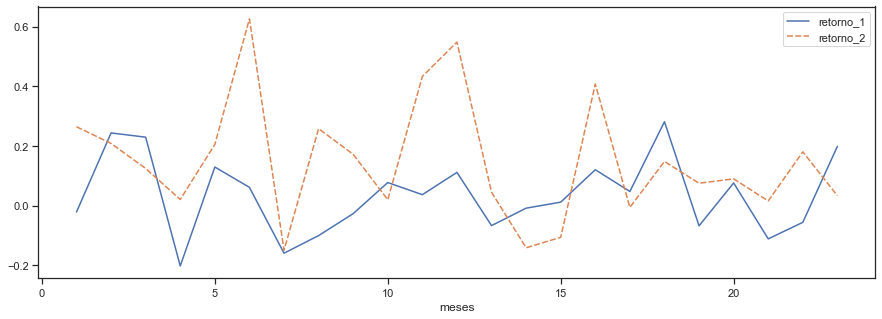

In [344]:
# plotar o gráfico
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.lineplot(data = dados.set_index('meses', drop=True))

In [168]:
from scipy.stats import pearsonr

In [169]:
# Cálculo dos valores de correlação e valor-p
r, valor_p = pearsonr(dados.retorno_1, dados.retorno_2)
print('correlação: %.4f' % r)
print('valor-p: %.4f' % valor_p)

correlação: 0.2908
valor-p: 0.1782


In [272]:
# significância de alfa=5%
significancia = 0.05
confianca = 1 - significancia

**Teste de hipótese**  
H0: o coeficiente de correlação é estatisticamente igual a zero  
H1: o coeficiente de correlação é estatisticamente diferente de zero 

In [171]:
media_1 = dados.retorno_1.mean()
media_2 = dados.retorno_2.mean()
desvio_1 = dados.retorno_1.std()
desvio_2 = dados.retorno_2.std()

print('média do retorno da ação 1: %.4f' % media_1)
print('média do retorno da ação 2: %.4f' % media_2)
print('desvio do retorno da ação 1: %.4f' % desvio_1)
print('desvio do retorno da ação 2: %.4f' % desvio_1)

média do retorno da ação 1: 0.0352
média do retorno da ação 2: 0.1511
desvio do retorno da ação 1: 0.1292
desvio do retorno da ação 2: 0.1292


In [172]:
from scipy.stats import linregress

In [173]:
slope, intercept, r_value, p_value, std_err = linregress(dados.retorno_1, dados.retorno_2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retorno_1', ylabel='retorno_2'>

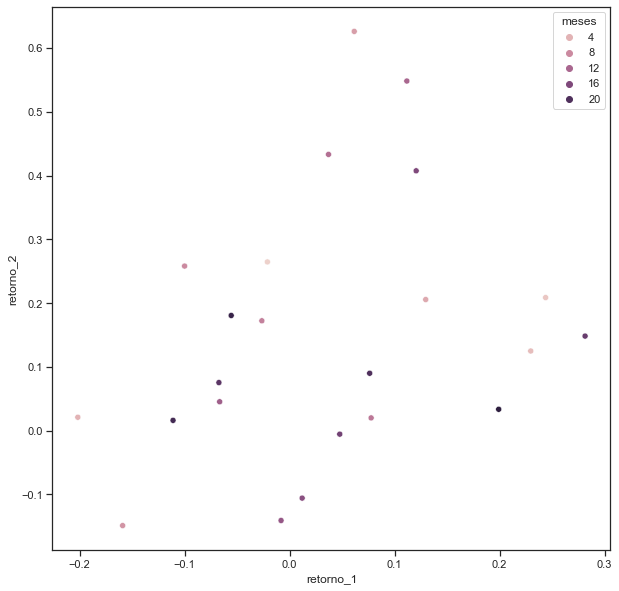

In [343]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.scatterplot(dados.retorno_1, dados.retorno_2, hue='meses',data=dados, )

In [185]:
# Verificando o teste de hipótese utilizando o valor-p
if p_value<=significancia:
    print('Rejeito H0')
else:
    print('Não rejeito H0')

Não rejeito H0


In [241]:
from scipy.stats import t as t_student

In [282]:
## Observações
N = n_obs

## Dados
a = dados.retorno_1
b = dados.retorno_2

## Calculate the t-statistics
t = r_value/np.sqrt((1-(r_value)**2)/(N-2))

## Compare with the critical t-value
#Degrees of freedom
df = (2*N - 2) 

#p-value after comparison with the t 
p = t_student.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(p))

t = 1.392903935467747
p = 0.9146764132192408


In [285]:
# Valor crítico
valor_critico = np.abs(t_student.ppf(significancia/2, df = N - 2))

In [286]:
# Verificando o teste de hipótese utilizando estatística de teste
if t >= valor_critico:
    print('Rejeito H0')
else:
    print('Não rejeito H0')

Não rejeito H0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


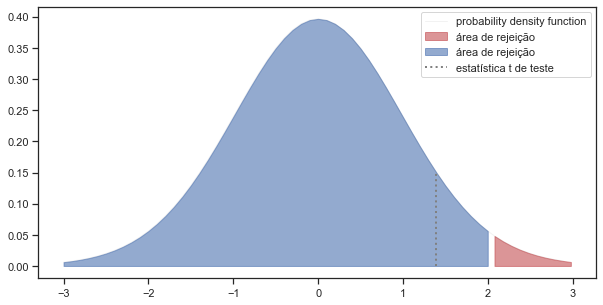

In [342]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

xmin = -3
xmax = 3

x = np.arange(xmin, xmax,0.1)
sns.lineplot(x, y=t_student.pdf(x,df=df), alpha=0.1, color='gray',lw=1, label='probability density function')

x_fill = np.arange(valor_critico, xmax, 0.1)
plt.fill_between(y1=t_student.pdf(x_fill,df=df), x=x_fill, color='r', alpha=0.6, label='área de rejeição')

x_fill = np.arange(xmin, valor_critico, 0.1)
plt.fill_between(y1=t_student.pdf(x_fill,df=df), x=x_fill, color='b', alpha=0.6, label='área de rejeição')

plt.vlines(t, ymin=0, ymax=t_student.pdf(t,df=df), color='gray', lw=2 ,linestyles='dotted', label = 'estatística t de teste')

plt.legend(loc='best')
plt.show()

In [ ]:
# Deletando todas as variáveis
%reset_selective -f a 

# <font color=green>Exercício 3<font>

In [354]:
from scipy.stats import binom

In [369]:
p = 1/6 # probabilidade de sucesso
q = 1 - p # probabilidade de fracasso
n = 10 # quantidade de testes, que no caso é o de jogadas

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


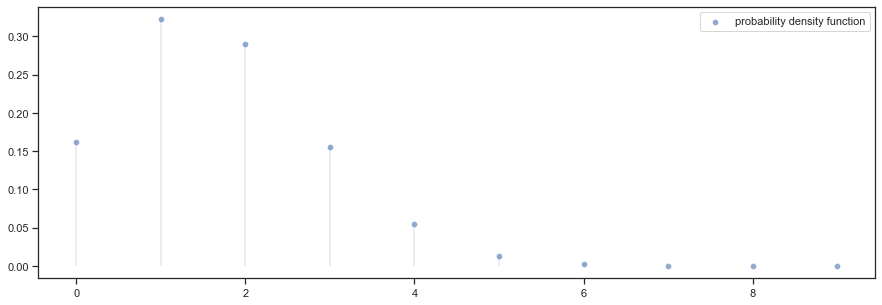

In [370]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

xmin = 0
xmax = 10

x = np.arange(xmin, xmax, 1)
sns.scatterplot(x, y=binom.pmf(k=x, p=p, n=n), alpha=0.6, color='b',lw=1, label='probability mass function')

plt.vlines(x, ymin=0, ymax=binom.pmf(k=x, p=1/6, n=10), alpha=0.6,color='b', lw=0.4 ,linestyles='solid')

plt.legend(loc='best')
plt.show()

Ter vitórias em 4 jogadas

In [379]:
prob = binom.pmf(k=4, n=10, p=1/6) * 100
print('probabilidade em ter vitória em 4 jogadas é de %.2f' % prob + ' %')

probabilidade em ter vitória em 4 jogadas é de 5.43 %


Ter vitória em pelo menos 7 jogadas

In [389]:
lst_prob = []
k = 7
iteracao = n - k + 1
for i in range(iteracao):
    lst_prob.append(binom.pmf(k=10-i, n=n, p=p))

print('probabilidade em ter vitória em 4 jogadas é de %.6f' % np.sum(lst_prob*100) + ' %')

probabilidade em ter vitória em 4 jogadas é de 0.026752 %


In [390]:
# Deletando todas as variáveis
%reset_selective -f a 

# <font color=green>Exercício 4<font>

In [393]:
from scipy.stats import nbinom

In [415]:
k, n, p = 20, 12, 3/5
print('A probabilidade é de {} %'.format((nbinom.pmf(k - n, n, p) * 100).round(2)))

A probabilidade é de 10.78 %


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


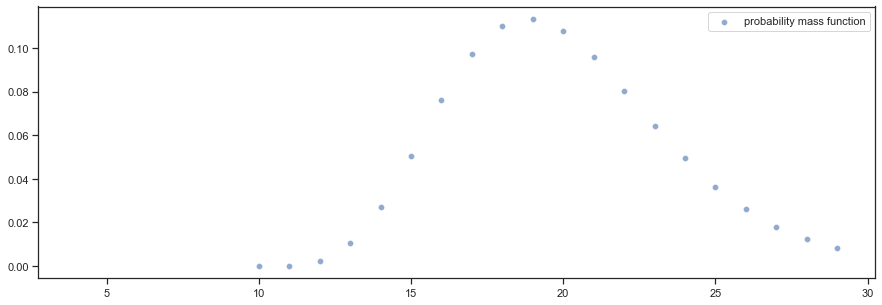

In [467]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

xmin = 10
xmax = 30

x = np.arange(xmin, xmax, 1)
sns.scatterplot(x, y= nbinom.pmf(x - n, n, p), alpha=0.6, color='b',lw=1, label='probability mass function')

plt.vlines(k, ymin=0, ymax = nbinom.pmf(k - n, n, p), alpha=0.6, color='r', lw=0.4 ,linestyles='solid')

plt.legend(loc='best')
plt.show()

# <font color=green>Exercício 5<font>

In [416]:
from scipy.stats import poisson

In [441]:
mu, k = 3, 28/7

In [443]:
print('A probabilidade é de {} %'.format((poisson.pmf(k, mu)*100).round(4)))

A probabilidade é de 16.8031 %


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


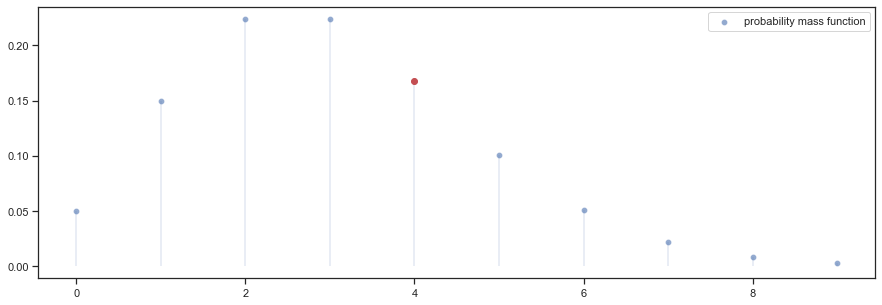

In [466]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

xmin = 0 
xmax = 10

x = np.arange(xmin, xmax, 1)
sns.scatterplot(x, y= poisson.pmf(x, mu), alpha=0.6, color='b',lw=1, label='probability mass function')

plt.plot(k, poisson.pmf(k, mu), 'ro', color='r')

plt.vlines(x, ymin=0, ymax = poisson.pmf(x, mu), alpha=0.6, color='b', lw=0.4 ,linestyles='solid')


plt.legend(loc='best')
plt.show()

In [468]:
# Deletando todas as variáveis
%reset_selective -f a 

# <font color=green>Exercício 6<font>

In [469]:
from scipy.stats import norm

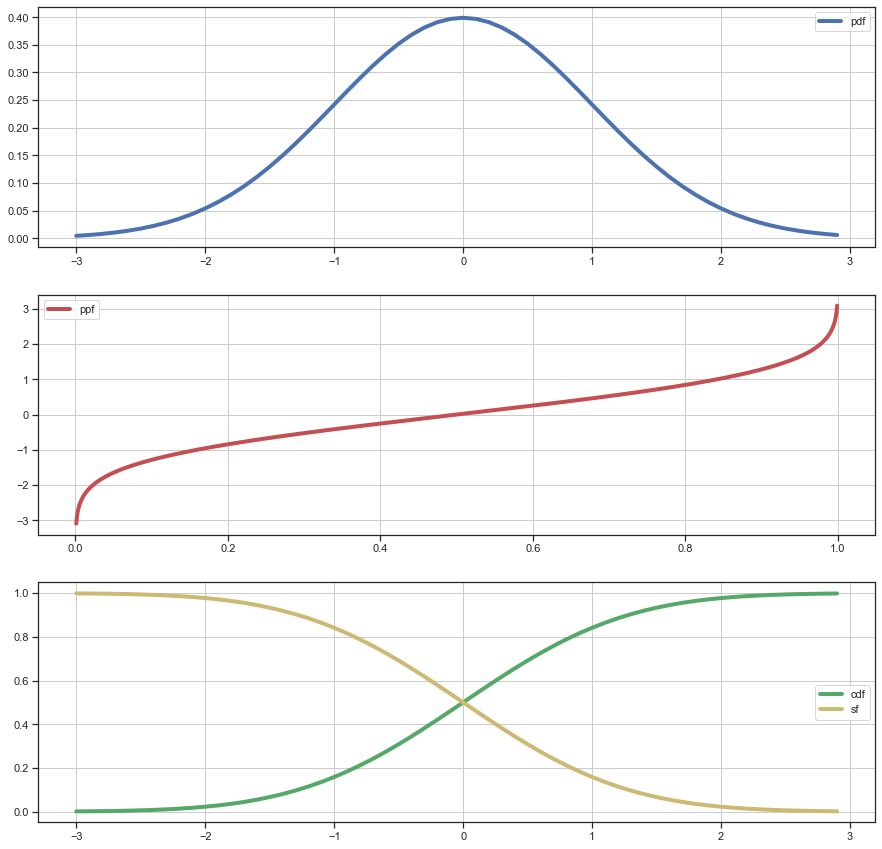

In [520]:
fig, ax = plt.subplots(3, 1, figsize=(15,15))

xmin = -3
xmax = 3

x = np.arange(xmin, xmax,0.1)
sns.lineplot(x, y=norm.pdf(x), alpha=1, color='b',lw=4, label='pdf', ax=ax[0])

x = np.arange(xmin, xmax,0.1)
sns.lineplot(x, y=norm.cdf(x), alpha=1, color='g',lw=4, label='cdf', ax=ax[2])

x = np.arange(xmin, xmax,0.1)
sns.lineplot(x, y=norm.sf(x), alpha=1, color='y',lw=4, label='sf', ax=ax[2])

xmin = 0
xmax = 1
x = np.linspace(xmin, xmax,1000)
sns.lineplot(x, y=norm.ppf(x), alpha=1, color='r',lw=4, label='ppf', ax=ax[1])

ax[0].grid()
ax[1].grid()
ax[2].grid()

plt.legend(loc='best')
plt.show()

In [470]:
tempo_medio, desvio = 26.5, 4

In [529]:
# P(X>37) = ???
z = (37 - tempo_medio)/desvio
probabilidade = norm.sf(z)
print('probabilidade = %.4f' % probabilidade)

probabilidade = 0.0043


In [530]:
# P(X<20) = ???
z = (20 - tempo_medio)/desvio
probabilidade = norm.cdf(z)
print('probabilidade = %.4f' % probabilidade)

probabilidade = 0.0521


In [532]:
# P(22<X<28) = ???
z_inf = (22 - tempo_medio)/desvio
z_sup = (28 - tempo_medio)/desvio

probabilidade_sup = norm.cdf(z_sup)
probabilidade_inf = norm.cdf(z_inf)
probabilidade = probabilidade_sup - probabilidade_inf
print('probabilidade = %.4f' % probabilidade)

probabilidade = 0.5159


In [533]:
# Deletando todas as variáveis
%reset_selective -f a 

# <font color=green>Exercício 7<font>

In [534]:
F_obs = [29,15,16]
F_esp = [20,20,20]

In [535]:
significancia = 0.05

In [536]:
from scipy.stats import chisquare

In [540]:
chisqd, p_valor = chisquare(F_obs, F_esp)
print('chi-quadrado: %.4f' % chisqd)
print('p-valor: %.4f' % p_valor)

chi-quadrado: 6.1000
p-valor: 0.0474


**Teste de hipótese**  
H0: não há diferença na preferência dos leitores   
H1: há diferença na preferência dos leitores

In [541]:
from scipy.stats import chi, chi2

In [555]:
# Valor crítico
valor_critico = chi2.ppf(1-significancia, 2)
print('valor crítico: %.4f' % valor_critico)

valor crítico: 5.9915


In [557]:
if valor_critico <= chisqd:
    print('Rejeito H0')
else:
    print('Não rejeito H0')

Rejeito H0


In [ ]:
# Deletando todas as variáveis
%reset_selective -f a 

# <font color=green>Exercício 8<font>

In [558]:
# Import dos dados
dados = pd.read_excel("Lista de Exercícios - Complementares (Final).xlsx", sheet_name="Exercício 8", usecols='A:B', nrows=14, engine="openpyxl")

In [569]:
dados.rename(columns={'Local A (mm)':'local_a_mm' ,'Local B (mm)':'local_b_mm'}, inplace=True)

In [582]:
dados

,local_a_mm,local_b_mm
0,8.9,5.6
1,7.7,4.9
2,8.6,6.6
3,3.9,5.9
4,7.6,6.5
5,10.2,5.9
6,9.6,3.6
7,8.9,5.6
8,9.6,8.8
9,5.5,7.8


In [572]:
var_a = dados.local_a_mm.var()
var_b = dados.local_b_mm.var()

print('var A: %.4f' % var_a)
print('var B: %.4f' % var_b)

var A: 11.6044
var B: 4.2027


In [560]:
significancia = 0.05

**Teste de hipótese**  
H0: as variâncias são estatisticamente iguais  
H1: a variabilidade A é maior que B

In [574]:
from scipy.stats import f

In [575]:
# Estatistica de teste
F = (var_a**2) / (var_b**2)
print('estatística de teste F: %.4f' % F)

estatística de teste F: 7.6241


In [589]:
n_obs = dados.shape[0]

In [590]:
# Valor crítico
valor_critico = f.ppf(0.95, dfn=n_obs - 1, dfd=n_obs - 1)
print('valor crítico: %.4f' % valor_critico)

valor crítico: 2.5769


In [591]:
if valor_critico <= F:
    print('Rejeito H0')
else:
    print('Não rejeito H0')

Rejeito H0


In [ ]:
# Deletando todas as variáveis
%reset_selective -f a 

# <font color=green>Exercício 9<font>

In [663]:
# Import dos dados
dados = pd.read_excel("Lista de Exercícios - Complementares (Final).xlsx", sheet_name="Exercício 9", usecols='A:B', nrows=20, engine="openpyxl")

In [664]:
dados.rename(columns={'Hospital 1':'hospital1','Hospital 2':'hospital2'}, inplace=True)

**Teste de Hipótese**  
H0: o tempo médio de espera é igual  
H1: o tempo médio de espera são diferentes

In [665]:
from scipy.stats import ttest_ind, t as t_student

In [666]:
statistic, pvalue = ttest_ind(dados.hospital1, dados.hospital2, equal_var=True)
print('estatística de teste: %.4f' % statistic)
print('valor-p: %.4f' % pvalue)

estatística de teste: 6.9208
valor-p: 0.0000


In [642]:
# Número de observações
N = dados.shape[0]

In [ ]:
df = 2*N-2

In [652]:
significancia = 0.01
confianca = 1 - significancia

In [690]:
# Cálculo valor t crítico
n_A = N
n_B = N
s_A = round(dados.hospital1.std(),2)
s_B = round(dados.hospital2.std(),2)
s2_p = ((n_A - 1)/(n_A + n_B - 2))*s_A**2 + ((n_B - 1)/(n_A + n_B - 2))*s_B**2 
s_p  = np.sqrt(s2_p)
s_p

10.831740395707424

In [694]:
# Valor crítico
valor_critico = t_student.cdf(s_p, df = 2*N-2).round()
valor_critico

1.0

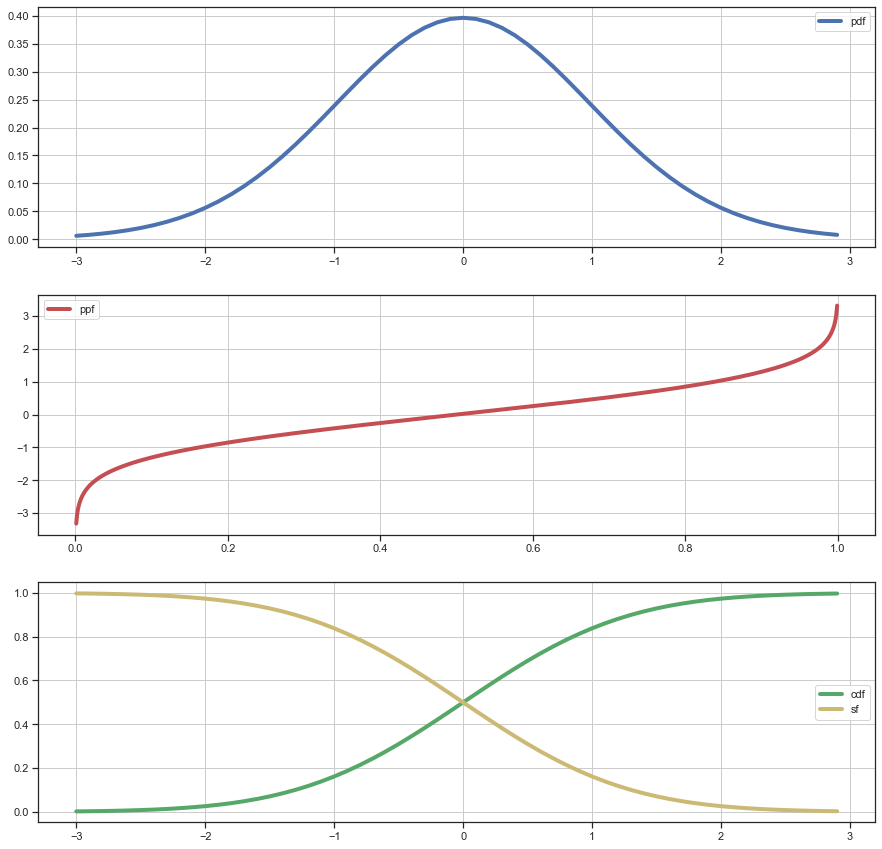

In [684]:
fig, ax = plt.subplots(3, 1, figsize=(15,15))

xmin = -3
xmax = 3

x = np.arange(xmin, xmax,0.1)
sns.lineplot(x, y=t_student.pdf(x, df = 2*N-2), alpha=1, color='b',lw=4, label='pdf', ax=ax[0])

x = np.arange(xmin, xmax,0.1)
sns.lineplot(x, y=t_student.cdf(x, df = 2*N-2), alpha=1, color='g',lw=4, label='cdf', ax=ax[2])

x = np.arange(xmin, xmax,0.1)
sns.lineplot(x, y=t_student.sf(x, df = 2*N-2), alpha=1, color='y',lw=4, label='sf', ax=ax[2])

xmin = 0
xmax = 1
x = np.linspace(xmin, xmax,1000)
sns.lineplot(x, y=t_student.ppf(x, df = 2*N-2), alpha=1, color='r',lw=4, label='ppf', ax=ax[1])

ax[0].grid()
ax[1].grid()
ax[2].grid()

plt.legend(loc='best')
plt.show()

In [695]:
if valor_critico <= statistic:
    print('Rejeito H0')
else:
    print('Não rejeito H0')

Rejeito H0


In [698]:
if significancia >= pvalue:
    print('Rejeito H0')
else:
    print('Não rejeito H0')

Rejeito H0


---

In [607]:
var_1 = dados.hospital1.std()
var_2 = dados.hospital2.std()

print('variância hospital 1: %.4f' % var_1)
print('variância hospital 2: %.4f' % var_2)

variância hospital 1: 11.7361
variância hospital 2: 9.8387


In [ ]:
# Deletando todas as variáveis
%reset_selective -f a 

# <font color=green>Exercício 10<font>

In [710]:
from scipy.stats import t as t_student

In [704]:
# Amostra
n = 36
x_media = 65
s = 3.5

# Histórico
mu = 60

# Significância
alfa = 0.05

> **Teste de Hipótese**  
H0: a quantidade de calorias histórica é igual a quantidade amostral  
H1: a quantidade de calorias histórica é diferente da quantidade amostral

In [703]:
# estatística de teste
t = (x_media - mu)/ (3.5/np.sqrt(n))
t

8.571428571428571

In [713]:
# valor crítico
t_critico = np.abs(t_student.ppf(alfa/2, n-1))
t_critico

2.030107928250343

In [709]:
if t_critico <= t:
    print('Rejeito H0')
else:
    print('Não reijeito H0')

Rejeito H0


In [720]:
p_valor = t_student.pdf(t,df=n-1)
p_valor

5.695131854406174e-10

In [721]:
# Deletando todas as variáveis
%reset_selective -f a 

# <font color=green>Exercício 11<font>

In [ ]:
# Deletando todas as variáveis
%reset_selective -f a 

# <font color=green>Exercício 12<font>

In [ ]:
# Deletando todas as variáveis
%reset_selective -f a 

---